<a href="https://colab.research.google.com/github/siwookim1114/Data-Science-Projects/blob/main/%EC%9D%B8%EB%8F%84%EC%9D%98_%EC%A4%91%EA%B3%A0%EC%B0%A8_%EA%B0%80%EA%B2%A9_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 중고차 가격 데이터 분석

In [ ]:
### 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [ ]:
# 파일 경로 설정하기
file_path = "/content/drive/MyDrive/ML AI/Mega/데이터분석/데이터/used_car.csv"

# 데이터 불러오기
df = pd.read_csv(file_path, index_col = 0)  ## 0번, 첫번째 콜롬을 행 인덱스로 보냄 (Unnamed 없애기 위해서)

# 결과 확인하기
print(df)

## Unamed : 0은 csv가 저장될때 행 인덱스를 무시하고 빼고 저장해야되는데 그냥 살아있는 상태로 저장하면 이렇게 됨 (이걸 불러들이면)
### 기존 행 인덱스가 콜롬으로 변했음 -> 행 인덱스가 없어도 csv()로 만들면 알아서 만들어짐
### 해결법: index_col를 쓰면 됨

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage 

In [ ]:
### 데이터에 대한 전반적인 정보 (개요) 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5876 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


## 데이터 전처리

### 누락 데이터 처리

In [ ]:
### 각 콜롬별 누락 데이터의 수 확인
num_nulls = df.isnull().sum()
print(f"각 컬럼별 누락 데이터의 수 : \n{num_nulls}")

# 전체 데이터 개수가 6019인데 그 중에 New_Price는 5195개가 누락임. (New_Price는 콜롬 자체가 5/6가 비어있고 문제임 -> 깔끔하게 버림 (못씀))

각 컬럼별 누락 데이터의 수 : 
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64


#### New_Price 컬럼

In [ ]:
### 컬럼제거
cleaned_df = df.drop(columns = ["New_Price"])   ## 원래 구조상 여러개를 리스트에 담아서 한번에 삭제할 수 있어서 하나여도 리스트에 담아준다
print(cleaned_df)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage 

#### Mileage, Engine, Power 컬럼

In [ ]:
### 얘네는 누락 데이터가 몇개 안되서 누락 데이터가 있는 행 제거 => dropna() (기본이 행 제거 (누락행만 제거함))
## subset: dropna의 기준이 되는 콜롬들 (그 Subset안에 있는 누락 데이터만 찾아서 제거)
## ignore_index : 행을 삭제후 index아래가 위로 자동으로 올라와서 자동 정렬
## Seats컬럼에 있는 누락 데이터는 일단 살림 (42개 밖에 안되고 별로 안중요함 다른 데이터도 덩달아서 삭제되면 안됨)
cleaned_df.dropna(subset = ["Mileage", "Engine", "Power"], ignore_index = True, inplace = True)
print(f"누락 데이터가 있는 행 제거 한 결과 : \n{cleaned_df}")

누락 데이터가 있는 행 제거 한 결과 : 
                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
5869                  Maruti Swift VDI       Delhi  2014              27365   
5870          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
5871             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
5872                Maruti Wagon R VXI     Kolkata  2013              46000   
5873             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission

### 단위제거
숫자 + 단위 -> 단위 때문에 문자

In [ ]:
'''
1. 목표 : 값에 단위가 붙어있는 컬럼에 대해서 단위 제거
2. 대상 컬럼 : Mileage, Engine, Power
3. 예시) 28.4 kmpl --> 28.4
4. 방법 : 공백을 기준으로 문자열 split --> "28.4 kmpl".split()[0]
'''

# # DataFrame 복사
# df_test1 = cleaned_df.copy()   ## 데이터프레임에 제공되는 전용 함수중에 copy()라는 함수가 있음
# df_test2 = cleaned_df.copy()
# df_test3 = cleaned_df.copy()


# # 단위 제거 함수 정의
# def remove_unit(x):   ## 각 지정 콜롬으로부터 값을 x에 하나씩 받아서 split()으로 공백 기준으로 자르고 앞부분만 추출하면 단위만 뺼 수 있음
#   return x.split()[0]

# # Mileage, Engine, Power 컬럼
# df_test2.loc[:, ["Mileage",  "Engine", "Power"]] = df_test2.loc[:, ["Mileage", "Engine", "Power"]].applymap(remove_unit)
# print(df_test2)

# # Mileage 컬럼
# ## Mileage 콜롬안에 있는 모든 열을 뽑아서 apply()를 써가지고 함수를 적용 (for 문 X)
# df_test1.loc[:, "Mileage"] = df_test1.loc[:, "Mileage"].map(remove_unit) ## 수정된 값을 같은 이름으로 저장 (inplace)
# print(df_test1.loc[:, "Mileage"])

# print("-" * 80)

# # Engine 컬럼
# ## remove_unit(x) 함수 자체가 워낙 단순하므로 그냥 apply(lambda x: )로 처리
# ## lambda에 익숙해지면 apply(lambda)가 되게 편리해짐
# ## apply() 함수는 따로 inplace = True가 없어서 저렇게 덮어씌움
# df_test1.loc[:, "Engine"] = df_test1.loc[:, "Engine"].map(lambda x: x.split()[0])   ## 따로 정의 할 필요없음
# print(df_test1.loc[:, "Engine"])

# print("-" * 80)

# # Power 컬럼
# df_test1.loc[:, "Power"] = df_test1.loc[:, "Power"].map(lambda x : x.split()[0])
# print(df_test1.loc[:, "Power"])

# Mileage, Engine, Power 컬럼
cleaned_df.loc[:, ["Mileage", "Engine", "Power"]] = cleaned_df.loc[:, ["Mileage", "Engine", "Power"]].applymap(lambda x: x.split()[0])
print(cleaned_df)


                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
5869                  Maruti Swift VDI       Delhi  2014              27365   
5870          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
5871             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
5872                Maruti Wagon R VXI     Kolkata  2013              46000   
5873             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type Mileage Engi

In [ ]:
### 단위 제거 후 기본 정보 확인
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5874 non-null   object 
 1   Location           5874 non-null   object 
 2   Year               5874 non-null   int64  
 3   Kilometers_Driven  5874 non-null   int64  
 4   Fuel_Type          5874 non-null   object 
 5   Transmission       5874 non-null   object 
 6   Owner_Type         5874 non-null   object 
 7   Mileage            5874 non-null   object 
 8   Engine             5874 non-null   object 
 9   Power              5874 non-null   object 
 10  Seats              5872 non-null   float64
 11  Price              5874 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 550.8+ KB


#### 자료형 변환

In [ ]:
"""
1. 목표 : Mileage, Engine, Power 컬럼의 성격(자료형) --> 문자열 --> Mileage, Power --> float 변환, Engine --> int
2. 사용 함수 : df.astype({'col1':'float', 'col2':'int'})
"""

## Dataframe 전용 함수중에 .astype({}) 으로 타입 변환 가능
### 어떤 자료형을 특정한 자료형으로 지정한 자리에 변환 가능
## Engine만 소숫점이 없으니깐 정수로 바꿔줌
## 얘도 inplace = True 같은 cleaned_df 자료형에 덮어씌워서 저장

cleaned_df = cleaned_df.astype({"Mileage" : "float",
                   "Engine" : "int",
                   "Power" : "float"})

# 결과 확인하기
print("자료형 변환 결과 : ")
cleaned_df.info()


자료형 변환 결과 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5874 non-null   object 
 1   Location           5874 non-null   object 
 2   Year               5874 non-null   int64  
 3   Kilometers_Driven  5874 non-null   int64  
 4   Fuel_Type          5874 non-null   object 
 5   Transmission       5874 non-null   object 
 6   Owner_Type         5874 non-null   object 
 7   Mileage            5874 non-null   float64
 8   Engine             5874 non-null   int64  
 9   Power              5874 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5874 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 550.8+ KB


### 불필요한 컬럼 제거

In [ ]:
"""
### 제거 대상 컬럼 : Location, Owner_type, Seats
"""

cleaned_df.drop(columns = ["Location", "Owner_Type", "Seats"], inplace = True)  ## 이 3개 불필요한 컬럼 제거
print(cleaned_df)

                                  Name  Year  Kilometers_Driven Fuel_Type  \
0               Maruti Wagon R LXI CNG  2010              72000       CNG   
1     Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
2                         Honda Jazz V  2011              46000    Petrol   
3                    Maruti Ertiga VDI  2012              87000    Diesel   
4      Audi A4 New 2.0 TDI Multitronic  2013              40670    Diesel   
...                                ...   ...                ...       ...   
5869                  Maruti Swift VDI  2014              27365    Diesel   
5870          Hyundai Xcent 1.1 CRDi S  2015             100000    Diesel   
5871             Mahindra Xylo D4 BSIV  2012              55000    Diesel   
5872                Maruti Wagon R VXI  2013              46000    Petrol   
5873             Chevrolet Beat Diesel  2011              47000    Diesel   

     Transmission  Mileage  Engine   Power  Price  
0          Manual    26

### 이상치 제거

Year 컬럼 이상치 시각화


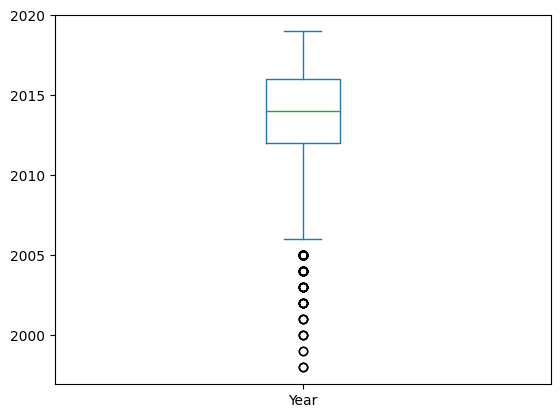

--------------------------------------------------------------------------------
Kilometers_Driven 컬럼 이상치 시각화


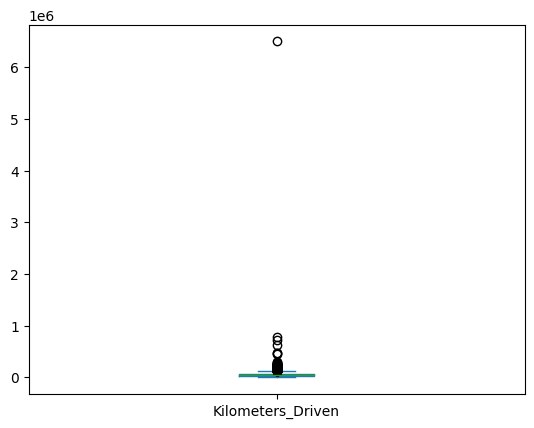

--------------------------------------------------------------------------------
Mileage 컬럼 이상치 시각화


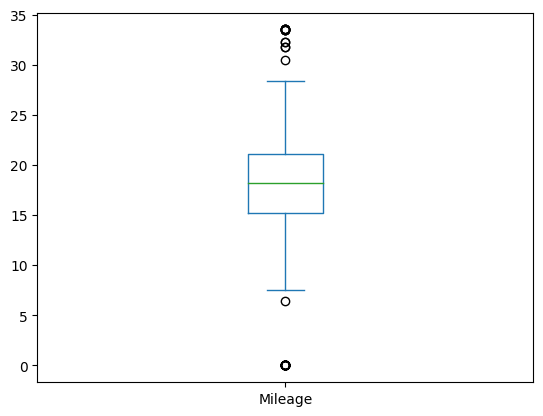

--------------------------------------------------------------------------------
Engine 컬럼 이상치 시각화


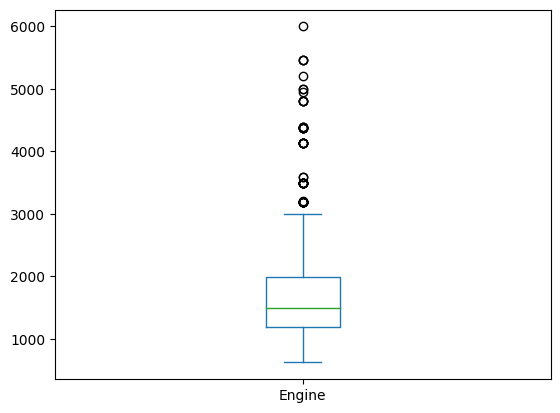

--------------------------------------------------------------------------------
Power 컬럼 이상치 시각화


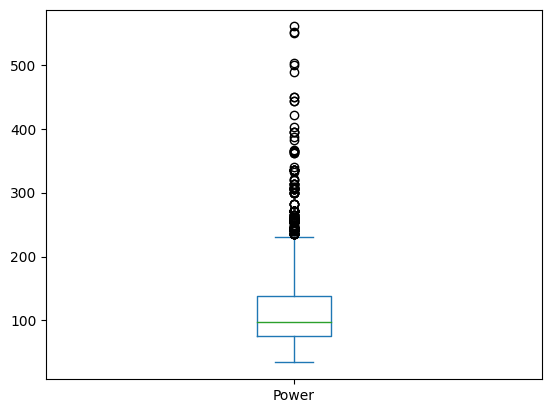

In [ ]:
"""
숫자로 되어있어서 이상치가 충분히 존재할 수 있는 컬럼들이 대상이 됨
# 대상 컬럼 : Year, Kilometers_Driven, Mileage, Engine, Power
"""

### 컬럼의 성격이 비슷하면 (숫자들의 자릿수의 단위가 비슷) 한번에 여러개의 그래프로 그릴 수 있다

# Year 컬럼
print(f"Year 컬럼 이상치 시각화")
cleaned_df.loc[:, "Year"].plot(kind = "box")   ## 박스 플롯 그리기
plt.show()

print("-" * 80)

# Kilometers_Driven 컬럼
print(f"Kilometers_Driven 컬럼 이상치 시각화")
cleaned_df.loc[:, "Kilometers_Driven"].plot(kind = "box")   ## 박스 플롯 그리기
plt.show()

print("-" * 80)

# Mileage 컬럼
print(f"Mileage 컬럼 이상치 시각화")
cleaned_df.loc[:, "Mileage"].plot(kind = "box")   ## 박스 플롯 그리기
plt.show()

print("-" * 80)

# Engine 컬럼
print(f"Engine 컬럼 이상치 시각화")
cleaned_df.loc[:, "Engine"].plot(kind = "box")   ## 박스 플롯 그리기
plt.show()

print("-" * 80)

# Power 컬럼
print(f"Power 컬럼 이상치 시각화")
cleaned_df.loc[:, "Power"].plot(kind = "box")   ## 박스 플롯 그리기
plt.show()

## 결과 : 각각 콜롬마다 이상치가 있음

#### Year 컬럼

In [ ]:
# # Year 컬럼의 첫번째 이상치 제거

# # iqr 추출
# ## quantile(q = ) 함수를 쓰면 원하는 분위수 뽑을 수 있음
# q1 = cleaned_df.loc[:, "Year"].quantile(q = 0.25)   ## 1사분위가 됨
# q3 = cleaned_df.loc[:, "Year"].quantile(q = 0.75)   ## 3사분위가 됨
# iqr = q3 - q1                                       ## q3 - q1 (3사분위 - 1사분위)가 iqr이 됨
# print(f"Year 컬럼의 첫번쨰 iqr : {iqr}")

# print("-" * 80)

# # 정상 범위의 최소값 / 최대값 추출
# min = q1 - (1.5 * iqr)    ## IQR의 가중치 1.5배를 곱해서 1사분위에서 빼준게 최소값
# print(f"Year 컬럼의 첫번째 정상 범위의 최소값 : {min}")
# max = q3 + (1.5 * iqr)    ## IQR의 가중치 1.5배를 곱해서 3사분위에서 더해준게 최대값
# print(f"Year 컬럼의 첫번째 정상 범위의 최대값 : {max}")

# print("-" * 80)

# # Year 첫번째 이상치 index 추출 --> 비교 연산자 + 논리 연산자 (합집합)
# ### df.drop(index = 이상치 index) 로 없앨거래서 index가 중요함
# condition1 = (cleaned_df.loc[:, "Year"] < min)
# condition2 = (cleaned_df.loc[:, "Year"] > max)

# condition = condition1 | condition2   ## 둘 중 하나만 만족해도 이상치 (그래서 합집합으로 함) => 교집합은 당연히 만족할 수 없음

# ## 저 컨디션에 해당되는 이상치의 row만 뽑음 (Year컬럼 안에서)
# ### 시리즈의 이상치들만 모아놓은 값의 index는 .index로 추출 가능
# year_outlier_index = cleaned_df.loc[:, "Year"].loc[condition].index
# print(f"Year 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{year_outlier_index}")

# print('-' * 80)

# # Year 컬럼의 첫번째 이상치 제거
# cleaned_Year1 = cleaned_df.loc[:, "Year"].drop(index = year_outlier_index) ## 이상치들만 제거
# print(f"첫번째 이상치를 제거하고 남는 데이터 : \n{cleaned_Year1}")

# print("-" * 80)

# # 두번째 이상치 존재 여부 확인
# ## cleaned_Year1은 이상치를 제거하고 남은 Series임 (이미 "Year"에 대한)
# cleaned_Year1.plot(kind = "box")
# plt.show()

# ## 결과: 이상치 없음


##### 첫번째 이상치 제거 함수 정의

In [ ]:
## 매개변수로 데이터프레임이랑 콜롬이 필요함
def remove_outliers(df, column):
  # iqr 추출
  q1 = df.loc[:, column].quantile(q = 0.25)
  q3 = df.loc[:, column].quantile(q = 0.75)
  iqr = q3 - q1

  # 정상 범위의 최소값 / 최대값 추출
  min = q1 - (1.5 * iqr)
  max = q3 + (1.5 * iqr)

  # 이상치 index 추출 --> 비교 연산자 + 논리 연산자 (합집합)
  condition = (df.loc[:, column] < min) | (df.loc[:, column] > max)
  ## 특정 위치를 찾기 이해서 .loc를 씀
  ## column안에서 모든 row를 먼저 추출하고 그 안에서 저 condition에 해당되는 row만 뽑고 index 추출
  outlier_index = df.loc[:, column].loc[condition].index

  # 이상치 제거 후 정제된 컬럼이라는 새 변수에 저장
  cleaned_column = df.loc[:, column].drop(index = outlier_index)

  return cleaned_column

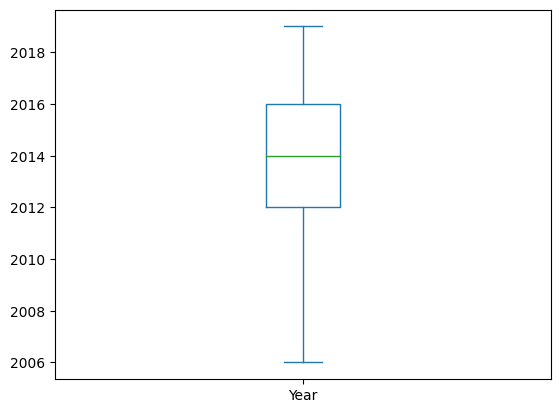

In [ ]:
### 첫번째 이상치 제거 함수 실행

# # 매개 변수의 값(argument) 설정
# df = cleaned_df
# column = "Year"

# 함수 실행 : Year 컬럼으로부터 첫번째 이상치 제거
cleaned_Year1 = remove_outliers(df = cleaned_df, column = "Year")

# 결과 확인하기
cleaned_Year1.plot(kind = "box")
plt.show()

#### Kilometers_Driven 컬럼

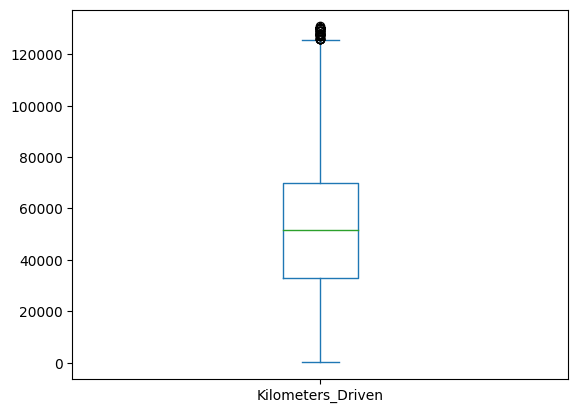

In [ ]:
### 첫번째 이상치 제거 함수 실행

# 함수 실행
cleaned_Kilometers1 = remove_outliers(df = cleaned_df, column = "Kilometers_Driven")

# 결과 확인하기
cleaned_Kilometers1.plot(kind = "box")
plt.show()

In [ ]:
# ### Kilometers_Driven 컬럼의 두번째 이상치 제거
# #### 두번째 이상치부터는 한번 이상치를 제거하고 남은 Series가 됨

# # iqr 추출
# q1 = cleaned_Kilometers1.quantile(q = 0.25)
# q3 = cleaned_Kilometers1.quantile(q = 0.75)
# iqr = q3 - q1
# print(f"Kilometers_Driven 컬럼의 두번쨰 iqr : {iqr}")

# print("-" * 80)

# # 정상 범위의 최소값 / 최대값 추출
# min = q1 - (1.5 * iqr)
# print(f"Kilometers_Driven 컬럼의 두번째 정상 범위의 최소값 : {min}")
# print("-" * 80)
# max = q3 + (1.5 * iqr)
# print(f"Kilometers_Driven 컬럼의 두번째 정상 범위의 최대값 : {max}")

# print("-" * 80)

# # Kilometers_Driven 컬럼의 두번째 이상치 index 추출 --> 비교 연산자 + 논리 연산자(합집합)
# ## 이미 cleaned_Kilometers는 위에 .loc로 다 세팅 되어있는 Series래서 이렇게 바로 비교 가능
# condition = (cleaned_Kilometers1 < min) | (cleaned_Kilometers1 > max)
# kilometers_outlier_index = cleaned_Kilometers1.loc[condition].index  ## 두번째 이상치 index
# print(f"Kilometers_Driven 컬럼의 두번째 이상치 데이터의 인덱스 : \n{kilometers_outlier_index}")

# print("-" * 80)

# # Kilometers_Driven 컬럼의 두번째 이상치 제거
# cleaned_Kilometers2 = cleaned_Kilometers1.drop(index = kilometers_outlier_index)

# # 결과 확인하기
# cleaned_Kilometers2.plot(kind = "box")
# plt.show()

#### 두번째 이상치 제거 함수 정의

In [ ]:
## 매개변수로 데이터프레임이랑 콜롬이 필요함
def remove_outliers2(series):
  # iqr 추출
  q1 = series.quantile(q = 0.25)
  q3 = series.quantile(q = 0.75)
  iqr = q3 - q1

  # 정상 범위의 최소값 / 최대값 추출
  min = q1 - (1.5 * iqr)
  max = q3 + (1.5 * iqr)

  # 이상치 index 추출 --> 비교 연산자 + 논리 연산자 (합집합)
  condition = (series < min) | (series > max)
  outlier_index = series.loc[condition].index

  # 이상치 제거
  cleaned_column2 = series.drop(index = outlier_index)

  return cleaned_column2

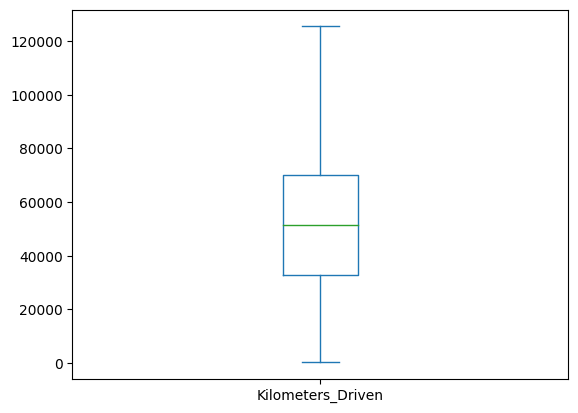

In [ ]:
### 두번째 이상치 제거 함수 실행

# 매개 변수의 값 (argument) 설정
# series = cleaned_Kilometers1

# 함수 실행
cleaned_Kilometers2 = remove_outliers2(series = cleaned_Kilometers1)

# 결과 확인하기
cleaned_Kilometers2.plot(kind = "box")
plt.show()


#### Mileage 컬럼

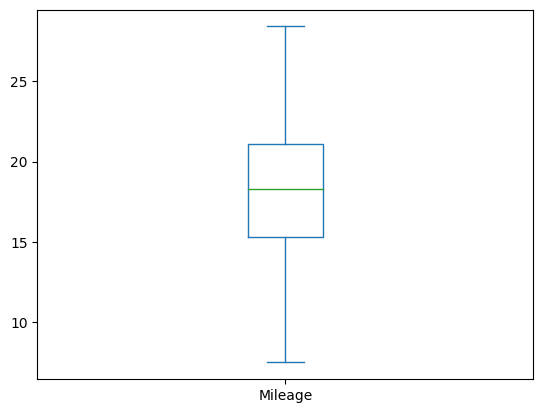

In [ ]:
### 첫번째 이상치 제거 함수 실행

# 함수 실행 : Mileage 컬럼으로부터 첫번째 이상치 제거
cleaned_Mileage1 = remove_outliers(df = cleaned_df, column = "Mileage")

# 결과 확인하기
cleaned_Mileage1.plot(kind = "box")
plt.show()

#### Engine 컬럼

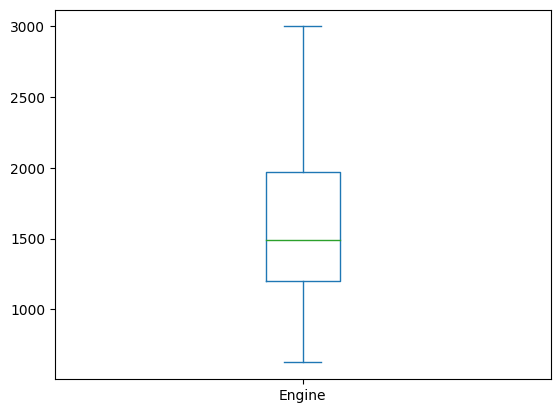

In [ ]:
### 첫번째 이상치 제거 함수 실행

# 함수 실행 : Engine 컬럼으로부터 첫번째 이상치 제거
cleaned_Engine1 = remove_outliers(df = cleaned_df, column = "Engine")

# 결과 확인하기
cleaned_Engine1.plot(kind = "box")
plt.show()

#### Power 컬럼

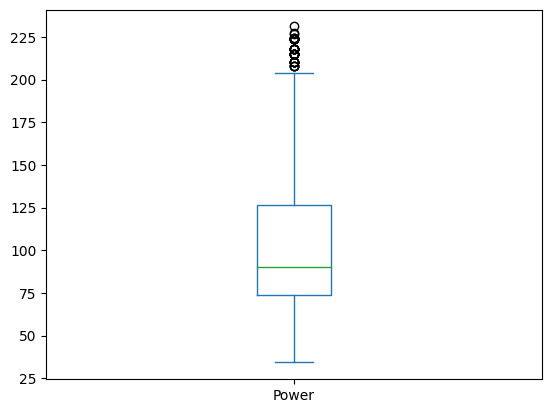

In [ ]:
### 첫번째 이상치 제거 함수 실행

# 함수 실행 : Year 컬럼으로부터 첫번째 이상치 제거
cleaned_Power1 = remove_outliers(df = cleaned_df, column = "Power")

# 결과 확인하기
cleaned_Power1.plot(kind = "box")
plt.show()

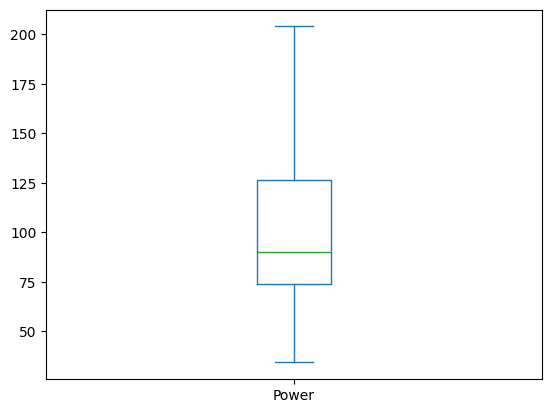

In [ ]:
### 두번째 이상치 제거 함수 실행

# 함수 실행
cleaned_Power2 = remove_outliers2(series = cleaned_Power1)

# 결과 확인하기
cleaned_Power2.plot(kind = "box")
plt.show()

#### 병합 (concat)

In [ ]:
### 이상치 제거 후 남아있는 데이터 확인하기

# Year 컬럼
print(cleaned_Year1)

print("-" * 80)

# Kilometers_Driven 컬럼
print(cleaned_Kilometers2)

print("-" * 80)

# Mileage 컬럼
print(cleaned_Mileage1)

print("-" * 80)

# Engine 컬럼
print(cleaned_Engine1)

print("-" * 80)

# Power 컬럼
print(cleaned_Power2)

0       2010
1       2015
2       2011
3       2012
4       2013
        ... 
5869    2014
5870    2015
5871    2012
5872    2013
5873    2011
Name: Year, Length: 5768, dtype: int64
--------------------------------------------------------------------------------
0        72000
1        41000
2        46000
3        87000
4        40670
         ...  
5869     27365
5870    100000
5871     55000
5872     46000
5873     47000
Name: Kilometers_Driven, Length: 5635, dtype: int64
--------------------------------------------------------------------------------
0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
5869    28.40
5870    24.40
5871    14.00
5872    18.90
5873    25.44
Name: Mileage, Length: 5830, dtype: float64
--------------------------------------------------------------------------------
0        998
1       1582
2       1199
3       1248
4       1968
        ... 
5869    1248
5870    1120
5871    2498
5872     998
5873     936
Name: Engine, Len

In [ ]:
### 원본 데이터
print(cleaned_df)

                                  Name  Year  Kilometers_Driven Fuel_Type  \
0               Maruti Wagon R LXI CNG  2010              72000       CNG   
1     Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
2                         Honda Jazz V  2011              46000    Petrol   
3                    Maruti Ertiga VDI  2012              87000    Diesel   
4      Audi A4 New 2.0 TDI Multitronic  2013              40670    Diesel   
...                                ...   ...                ...       ...   
5869                  Maruti Swift VDI  2014              27365    Diesel   
5870          Hyundai Xcent 1.1 CRDi S  2015             100000    Diesel   
5871             Mahindra Xylo D4 BSIV  2012              55000    Diesel   
5872                Maruti Wagon R VXI  2013              46000    Petrol   
5873             Chevrolet Beat Diesel  2011              47000    Diesel   

     Transmission  Mileage  Engine   Power  Price  
0          Manual    26

In [ ]:
### 각 컬럼 병합 --> 데이터프레임 생성

## y축 방향 => 컬럼이 공통될때 쓰는 방향 (y축 병합)
## 콜롬들을 순서적으로 나열
## axis는 서로 다 각기다른 콜롬이니깐 콜롬의 수가 늘어나도록 axis= 1 번방향으로 병합 (Name, Fuel_Type, 등 Series가 콜롬이 다 달라서 x축으로 쭉 가로로 병합 )
### Series가 콜롬이 다 공통되면 y축 방향으로 쭉 병합해도 됨 (행이 늘어나는 방향이 아니라 콜롬이 늘어나는 방향으로)
## join 방식은 갖고 있는 서로 인덱스가 다르니깐 공통된 성분만 선택되도록 교집합 (join="inner") => 교집합만 뽑음 (이상치 제거 후 (공통된거 선택 후 교집합만 뽑음))
## 인덱스 재설정을 수동으로 해줘야됨(형식상 인덱스는 5873까지 있지만 실제 데이터는 5213 까지 기록)

df_concat = pd.concat([cleaned_df.loc[:,"Name"],
                       cleaned_Year1,
                       cleaned_Kilometers2,
                       cleaned_df.loc[:,"Fuel_Type"],
                       cleaned_df.loc[:,"Transmission"],
                       cleaned_Mileage1,
                       cleaned_Engine1,
                       cleaned_Power2,
                       cleaned_df.loc[:,"Price"]], axis = 1, join = "inner")  ## 공통된 부분만 선택하면 누락이 없음 그래서 나중에 dropna()안하

# 결과 확인하기
print(df_concat)

                                  Name  Year  Kilometers_Driven Fuel_Type  \
0               Maruti Wagon R LXI CNG  2010              72000       CNG   
1     Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
2                         Honda Jazz V  2011              46000    Petrol   
3                    Maruti Ertiga VDI  2012              87000    Diesel   
4      Audi A4 New 2.0 TDI Multitronic  2013              40670    Diesel   
...                                ...   ...                ...       ...   
5869                  Maruti Swift VDI  2014              27365    Diesel   
5870          Hyundai Xcent 1.1 CRDi S  2015             100000    Diesel   
5871             Mahindra Xylo D4 BSIV  2012              55000    Diesel   
5872                Maruti Wagon R VXI  2013              46000    Petrol   
5873             Chevrolet Beat Diesel  2011              47000    Diesel   

     Transmission  Mileage  Engine   Power  Price  
0          Manual    26

In [ ]:
### index 재설정 --> reset_index() (데이터프레임의 인덱스를 reset 해줌)
# drop = True로 안하고 False로 하면 원하는 결과가 안나옴 (기본 디폴트가 drop = False => 맞지 않은 인덱스를 따로 보관함)
df_concat.reset_index(drop = True, inplace = True)  ## 결과를 그냥 실행하면 맞지 않은 인덱스가 따로 컬럼으로 재탄생됨 (Unnamed : 0 이랑 같은 원리) , inplace = True로 하면 원래 이름에 덮어씌움

# 결과 확인하기
print(df_concat)

                                  Name  Year  Kilometers_Driven Fuel_Type  \
0               Maruti Wagon R LXI CNG  2010              72000       CNG   
1     Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
2                         Honda Jazz V  2011              46000    Petrol   
3                    Maruti Ertiga VDI  2012              87000    Diesel   
4      Audi A4 New 2.0 TDI Multitronic  2013              40670    Diesel   
...                                ...   ...                ...       ...   
5208                  Maruti Swift VDI  2014              27365    Diesel   
5209          Hyundai Xcent 1.1 CRDi S  2015             100000    Diesel   
5210             Mahindra Xylo D4 BSIV  2012              55000    Diesel   
5211                Maruti Wagon R VXI  2013              46000    Petrol   
5212             Chevrolet Beat Diesel  2011              47000    Diesel   

     Transmission  Mileage  Engine   Power  Price  
0          Manual    26

## Feature Engineering

### Name 컬럼 정리

In [ ]:
### Name 컬럼 --> 항목별 빈도수 추출
name_counts = df_concat.loc[:, "Name"].value_counts()
print(f"Name 컬럼의 항목별 빈도수 : \n{name_counts}")

Name 컬럼의 항목별 빈도수 : 
Name
Mahindra XUV500 W8 2WD                 45
Maruti Swift VDI                       44
Honda City 1.5 S MT                    33
Maruti Swift Dzire VDI                 32
Hyundai i10 Sportz                     30
                                       ..
Hyundai i20 1.2 Era                     1
Toyota Camry W4 (AT)                    1
BMW 5 Series 2013-2017 520d M Sport     1
Chevrolet Sail Hatchback 1.2 LS ABS     1
Mahindra Xylo D4 BSIV                   1
Name: count, Length: 1572, dtype: int64


In [ ]:
### Name 컬럼 -->회사 이름만 남기고 차종은 생략 --> 새로운 컬럼 (company) 생성


df_concat.loc[:,"Company"] = df_concat.loc[:, "Name"].apply(lambda x:x.split()[0]) ##시리즈를 시리즈 안에 넣어서괜찮음

# 결과 확인하기
print(df_concat)

                                  Name  Year  Kilometers_Driven Fuel_Type  \
0               Maruti Wagon R LXI CNG  2010              72000       CNG   
1     Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
2                         Honda Jazz V  2011              46000    Petrol   
3                    Maruti Ertiga VDI  2012              87000    Diesel   
4      Audi A4 New 2.0 TDI Multitronic  2013              40670    Diesel   
...                                ...   ...                ...       ...   
5208                  Maruti Swift VDI  2014              27365    Diesel   
5209          Hyundai Xcent 1.1 CRDi S  2015             100000    Diesel   
5210             Mahindra Xylo D4 BSIV  2012              55000    Diesel   
5211                Maruti Wagon R VXI  2013              46000    Petrol   
5212             Chevrolet Beat Diesel  2011              47000    Diesel   

     Transmission  Mileage  Engine   Power  Price    Company  
0          M

In [ ]:
### Company 컬럼 --> 회사 이름의 항목별 빈도수 확인
company_counts = df_concat.loc[:,"Company"].value_counts()
print(f"Company 컬럼의 항목별 빈도수 : \n{company_counts}")

Company 컬럼의 항목별 빈도수 : 
Company
Maruti           1093
Hyundai          1018
Honda             579
Toyota            320
Volkswagen        308
Ford              257
Mahindra          244
Mercedes-Benz     227
BMW               169
Audi              168
Tata              162
Skoda             156
Renault           139
Chevrolet         116
Nissan             85
Land               39
Mini               26
Jaguar             20
Mitsubishi         20
Fiat               19
Jeep               15
Volvo              14
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Name: count, dtype: int64


In [ ]:
### "Isuzu" --> "ISUZU" 로 바꿔줌 (통일 해야됨 왜냐면 같은 회사 종류가 두개 나옴 ISUZU, Isuzu)
## 컬럼에 있는 값은 다른 값으로 얼마든지 바꿀 수 있음
condition = (df_concat.loc[:,"Company"] == "Isuzu")
df_concat.loc[condition,"Company"] = "ISUZU"

# 결과 확인하기
print(df_concat.iloc[2512, :])    ## Name에 있는걸 바꾼게 아니라 컴퍼니 이름을 바꿔서 Name은 Isuzu로 유지 (근데 나중에 어차피 네임콜롬은 삭제 할거임)

Name                 Isuzu MUX 4WD
Year                          2017
Kilometers_Driven            34429
Fuel_Type                   Diesel
Transmission             Automatic
Mileage                       13.8
Engine                        2999
Power                       174.57
Price                         20.0
Company                      ISUZU
Name: 2512, dtype: object


In [ ]:
### Company 컬럼 --> 회사 이름 (항목)의 개수

# Company 컬럼의 항목별 빈도수 수출
company_counts = df_concat.loc[:,"Company"].value_counts()
print(f"Company 컬럼의 항목별빈도수 : \n{company_counts}")

print("-" * 80)

# Company 컬럼의 항목별 빈도수 --> 인덱스 추출 --> 회사 이름 (Company 컬럼의 항목)
items = company_counts.index
print(f"Company 컬럼의 항목 : \n{items}")   ##성격은 리스트랑 완전히 똑같다 (slicing, indexing, 등됨 ) ==> 밑에 항목별 빈도수로 총 몇개의 컴퍼니가 있는지 알고 싶은데 일일이 안세고 그냥 len() 돌림 인덱스 쓰고

print("-" * 80)

# Company 컬럼의 항목의수
print(f"Company 컬럼의 항목의 수 = {len(items)} 개")

Company 컬럼의 항목별빈도수 : 
Company
Maruti           1093
Hyundai          1018
Honda             579
Toyota            320
Volkswagen        308
Ford              257
Mahindra          244
Mercedes-Benz     227
BMW               169
Audi              168
Tata              162
Skoda             156
Renault           139
Chevrolet         116
Nissan             85
Land               39
Mini               26
Mitsubishi         20
Jaguar             20
Fiat               19
Jeep               15
Volvo              14
Datsun             13
ISUZU               3
Force               3
Name: count, dtype: int64
--------------------------------------------------------------------------------
Company 컬럼의 항목 : 
Index(['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Volkswagen', 'Ford',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Audi', 'Tata', 'Skoda', 'Renault',
       'Chevrolet', 'Nissan', 'Land', 'Mini', 'Mitsubishi', 'Jaguar', 'Fiat',
       'Jeep', 'Volvo', 'Datsun', 'ISUZU', 'Force'],
      dtype='obj

 ## 데이터 탐색

In [ ]:
# 경고 메세지 제어 모듈 임폴트
import warnings

# 경고 메세지 처리 함수 호출 --> '무시'하도록 설정
warnings.filterwarnings('ignore')

### 상관 분석

In [ ]:
print(df_concat)

                                  Name  Year  Kilometers_Driven Fuel_Type  \
0               Maruti Wagon R LXI CNG  2010              72000       CNG   
1     Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
2                         Honda Jazz V  2011              46000    Petrol   
3                    Maruti Ertiga VDI  2012              87000    Diesel   
4      Audi A4 New 2.0 TDI Multitronic  2013              40670    Diesel   
...                                ...   ...                ...       ...   
5208                  Maruti Swift VDI  2014              27365    Diesel   
5209          Hyundai Xcent 1.1 CRDi S  2015             100000    Diesel   
5210             Mahindra Xylo D4 BSIV  2012              55000    Diesel   
5211                Maruti Wagon R VXI  2013              46000    Petrol   
5212             Chevrolet Beat Diesel  2011              47000    Diesel   

     Transmission  Mileage  Engine   Power  Price    Company  
0          M

In [ ]:
## corr() 쓸때 문자열이 있으면 에러뜸 => numeric_only = False로 디폴트 되어있는데 이걸 numeric_only = True로 하면 오로지 숫자로만 되어있는 컬럼만 선택해서 분석 (그래서 상관관계 분석 가능)
## 결과값이 행렬이 됨 (상관행렬)
## 다중공존성 (선형회귀 한다면 상관관계가 너무 큰 것 중 하나를 없애줘야됨)

# 상관행렬 추출
corr_matrix = df_concat.corr(numeric_only = True)

# 결과 확인하기  => Price는 엔진의 마력이랑 상관관계가 큼 (power 가 올라갈수록 -> Price 올라감 (이 경향이 가장 큼))
print(corr_matrix)

                       Year  Kilometers_Driven   Mileage    Engine     Power  \
Year               1.000000          -0.507755  0.265034 -0.043055  0.029518   
Kilometers_Driven -0.507755           1.000000 -0.125092  0.225829  0.067896   
Mileage            0.265034          -0.125092  1.000000 -0.618042 -0.533598   
Engine            -0.043055           0.225829 -0.618042  1.000000  0.820298   
Power              0.029518           0.067896 -0.533598  0.820298  1.000000   
Price              0.360985          -0.171554 -0.284296  0.586515  0.741385   

                      Price  
Year               0.360985  
Kilometers_Driven -0.171554  
Mileage           -0.284296  
Engine             0.586515  
Power              0.741385  
Price              1.000000  


### 탐색적 데이터 분석 (EDA)

#### 중고차 가격 분석

In [ ]:
print(df_concat.loc[:,"Price"])   ## 크기를 가지고 있는 그냥 연속형의 숫자 (숫자값의 분포) 시각화 => 히스토그램

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
5208     4.75
5209     4.00
5210     2.90
5211     2.65
5212     2.50
Name: Price, Length: 5213, dtype: float64


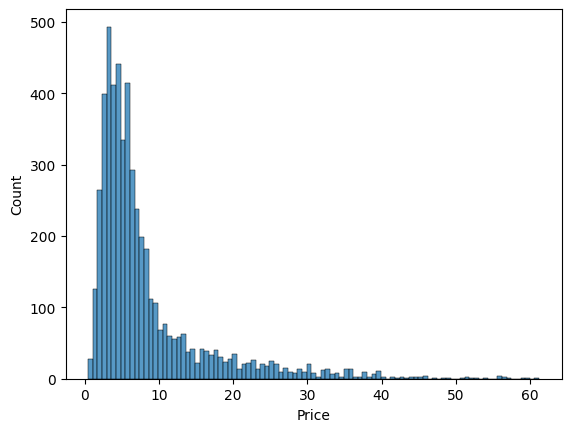

In [ ]:
### 중고차 가격의 분포 -> 시각화
sns.histplot(data = df_concat, x = "Price")
plt.show()

## 결과 : 저가쪽이 많음 (분포가 저가쪽에 치우쳐져있음)

In [ ]:
### 중고차 가격의 분포 분석 --> 통계 분석
stats = df_concat.loc[:,"Price"].describe()   ## 8가지 통계량을 알아서 뽑아줌
print(f"중고차 가격의 통계 요약 : {stats}")

중고차 가격의 통계 요약 : count    5213.000000
mean        8.262782
std         7.947368
min         0.440000
25%         3.550000
50%         5.550000
75%         9.000000
max        61.250000
Name: Price, dtype: float64


#### Price 컬럼과 Year 컬럼의 관계 분석

In [ ]:
df_concat.info()    ## 컬럼별 특성 분석

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5213 entries, 0 to 5212
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5213 non-null   object 
 1   Year               5213 non-null   int64  
 2   Kilometers_Driven  5213 non-null   int64  
 3   Fuel_Type          5213 non-null   object 
 4   Transmission       5213 non-null   object 
 5   Mileage            5213 non-null   float64
 6   Engine             5213 non-null   int64  
 7   Power              5213 non-null   float64
 8   Price              5213 non-null   float64
 9   Company            5213 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 407.4+ KB


In [ ]:
### Year 컬럼의 분포 --> 통계 분석
## 만약 데이터가 숫자래도 Year처럼 항목이 몇개 안될것으로 예상이 되면 빈도수를 뽑아낼 수 있음

# 년도별 빈도수
year_counts = df_concat.loc[:, "Year"].value_counts()
print(f"Year 컬럼의 년도별 빈도수 : \n{year_counts}")

print("-" * 80)

# 년도별 비율
year_ratio = df_concat.loc[:, "Year"].value_counts(normalize = True)
print(f"Year 컬럼의 년도별 비율 : \n{year_ratio}")

##결과 : 자동차가 2006년부터 수집 시작해서 2019년까지 있음 (남아있는게 (이상치 제거 후))

Year 컬럼의 년도별 빈도수 : 
Year
2014    745
2016    693
2015    684
2013    581
2017    556
2012    503
2011    393
2010    281
2018    277
2009    150
2008    129
2019     93
2007     85
2006     43
Name: count, dtype: int64
--------------------------------------------------------------------------------
Year 컬럼의 년도별 비율 : 
Year
2014    0.142912
2016    0.132937
2015    0.131210
2013    0.111452
2017    0.106656
2012    0.096490
2011    0.075388
2010    0.053904
2018    0.053136
2009    0.028774
2008    0.024746
2019    0.017840
2007    0.016305
2006    0.008249
Name: proportion, dtype: float64


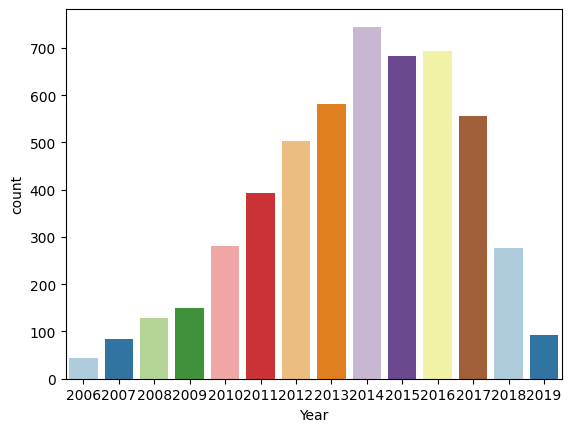

In [ ]:
### Year 컬럼의 분포 분석 --> 시각화
## 연속형 숫자이지만 항목이 몇개 안되니깐 카운트플롯으로 시각화
sns.countplot(data = df_concat, x = "Year", palette = "Paired")
plt.show()

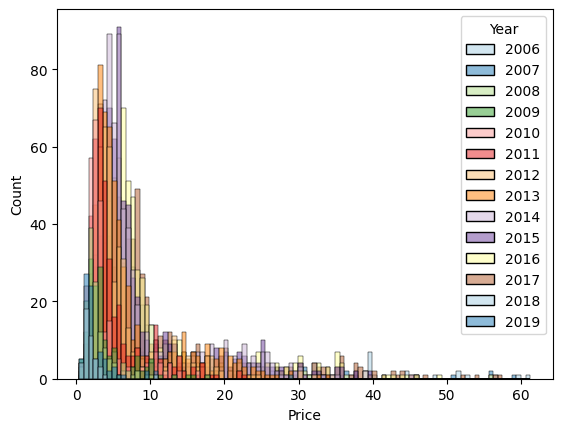

In [ ]:
### Price 컬럼과 Year 컬럼의 관계 시각화
## hue = "Price" 를 써서 년도별로 가격을 하나하나 쪼개면 너무 많아서 답 없음
sns.histplot(data = df_concat, x = "Price", hue = "Year", palette = "Paired")
plt.show()


                                     Name  Year  Kilometers_Driven Fuel_Type  \
1        Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
4         Audi A4 New 2.0 TDI Multitronic  2013              40670    Diesel   
6                  Nissan Micra Diesel XV  2013              86999    Diesel   
7       Toyota Innova Crysta 2.8 GX AT 8S  2016              36000    Diesel   
8     Volkswagen Vento Diesel Comfortline  2013              64430    Diesel   
...                                   ...   ...                ...       ...   
5205                 Honda Brio 1.2 VX MT  2013              33746    Petrol   
5207                Honda Amaze VX i-DTEC  2015              70602    Diesel   
5208                     Maruti Swift VDI  2014              27365    Diesel   
5209             Hyundai Xcent 1.1 CRDi S  2015             100000    Diesel   
5211                   Maruti Wagon R VXI  2013              46000    Petrol   

     Transmission  Mileage  Engine  Pow

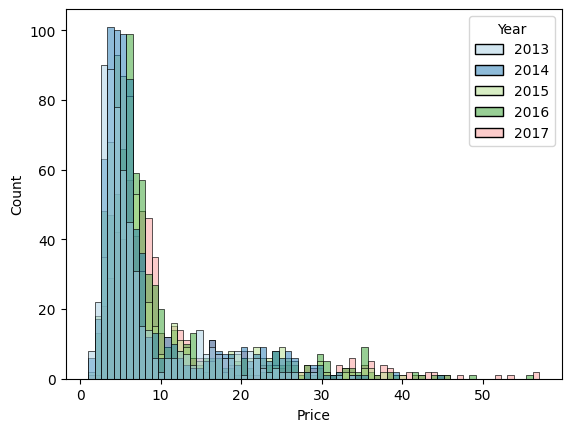

In [ ]:
### 2013 ~ 2017년까지 Price 컬럼과 Year 컬럼의 관계시각화

# 2013년 ~ 2017년까지 데이터 추출
condition = (df_concat.loc[:,"Year"] >= 2013) & (df_concat.loc[:,"Year"] <= 2017)
df_concat1 = df_concat.loc[condition, :]   ## 콜롬은 다 선택해서 새로운 데이터 프레임으로 만듬

# 결과 확인하기
print(df_concat1)

# histplot()을 이용한 시각화
sns.histplot(data = df_concat1, x = "Price", hue = "Year", palette = "Paired")
plt.show()

##결과: 이렇게 해도 히스토플롯으로는 구별이 잘 안됨

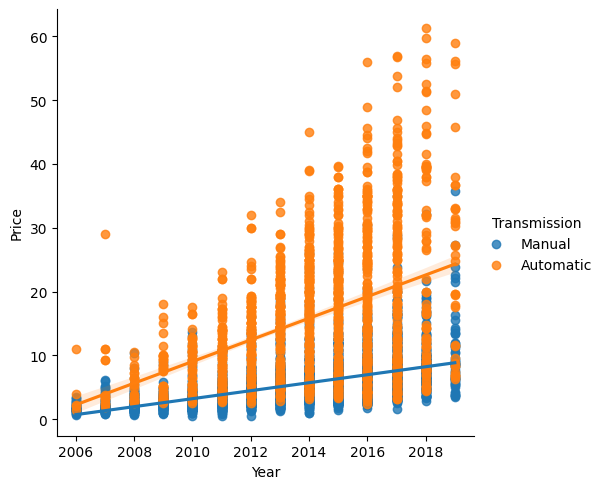

In [ ]:
### Price 컬럼과 Year 컬럼의 관계 시각화 -> lmplot(hue = "Transmission") 사용
sns.lmplot(data = df_concat,x = "Year", y = "Price", hue = "Transmission")
plt.show()

## 결과 : 점점 최신(최근으로) 년도가 갈수록 가격이 올라가는걸 볼 수 있음 (최대 가격등이).
## Automatic이 고가의 가격들을 전체적으로 차지하고 있는걸로 볼 수 있음.
## Manual는 점점 최신으로 가도 가격이 올라가긴 하는데 그렇게 크게 상승하는건 아니다. => 선형회귀 직선을 그었을때 기울기가 Automatic가 훨씬 크게 변함

#### Price 컬럼과 Kilometers_Driven 컬럼의 관계 분석

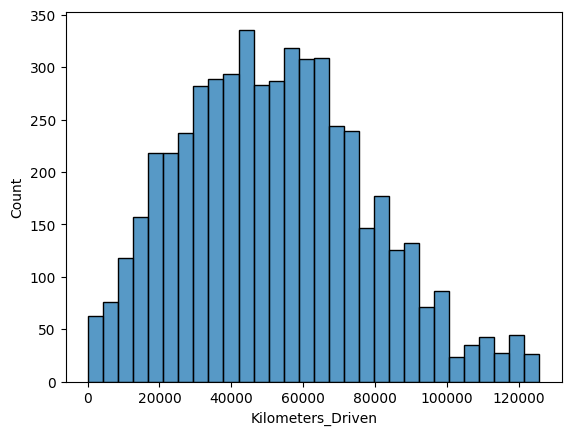

In [ ]:
### Kilometers_Driven컬럼의 분포 분석
## 거리니깐 매우 다양한 숫자여서 ->범위 (누적빈도수)를 히스토플롯으로 세봄
sns.histplot(data = df_concat, x = "Kilometers_Driven")
plt.show()

## 결과 : 주행거리가 정규분포에 가깝게 나옴

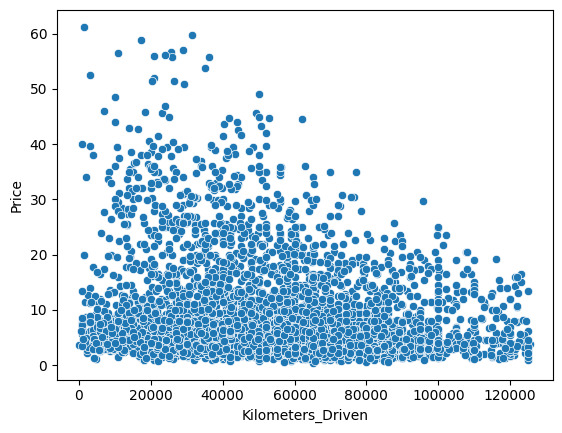

In [ ]:
### Price 컬럼과 Kilometers_Driven 컬럼의 관계 분석 --> scatterplot 이용
sns.scatterplot(data = df_concat, x = "Kilometers_Driven", y = "Price")
plt.show()

## 전체적으로 하락 경향을 보임 (maximum 값에서 아래로 쭉)

#### Price 컬럼과 Fuel_Type 컬럼의 관계 분석

In [ ]:
### Fuel_Type 컬럼의 분포 --> 통계 분석

# 항목별 빈도수
fuel_counts = df_concat.loc[:, "Fuel_Type"].value_counts()
print(f"Fuel_Type 컬럼의 항목별 빈도수 : \n{fuel_counts}")

print("-" * 80)

# 항목별 비율
fuel_ratio = df_concat.loc[:,"Fuel_Type"].value_counts(normalize = True)
print(f"Fuel Type 컬럼의 항목별 비율 : \n{fuel_ratio}")

Fuel_Type 컬럼의 항목별 빈도수 : 
Fuel_Type
Diesel    2688
Petrol    2474
CNG         41
LPG         10
Name: count, dtype: int64
--------------------------------------------------------------------------------
Fuel Type 컬럼의 항목별 비율 : 
Fuel_Type
Diesel    0.515634
Petrol    0.474583
CNG       0.007865
LPG       0.001918
Name: proportion, dtype: float64


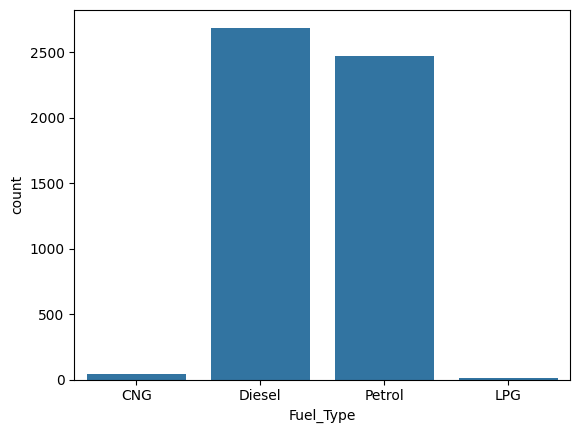

In [ ]:
### Fuel_Type 컬럼의 분포 시각화
sns.countplot(data = df_concat, x = "Fuel_Type")
plt.show()

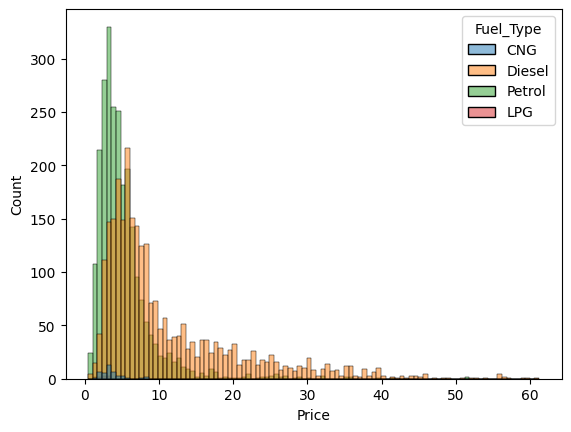

In [ ]:
### Price 컬럼과 Fuel_Type 컬럼의 관계 시각화
sns.histplot(data = df_concat,x = "Price",hue ="Fuel_Type")
plt.show()

## 저가쪽에 더 많은게 Petrol, 고가쪽에 좀 더 치우쳐져 있는게 디젤

In [ ]:
### Price 컬럼과 Fuel_Type 컬럼의 관계 --> 통계분석

# Fuel_Type == Diesel, 가격 분포에 대한 요약 통계량
condition1 = (df_concat.loc[:, "Fuel_Type"] == "Diesel")
stats1 = df_concat.loc[condition1, "Price"].describe()
print(f"Diesel의 경우, 가격 분포에 대한 요약 통계량 : \n{stats1}")

print("-" * 80)
# Fuel_Type == Petrol, 가격 분포에 대한 요약 통계량
condition2 = (df_concat.loc[:, "Fuel_Type"] == "Petrol")
stats2 = df_concat.loc[condition2, "Price"].describe()
print(f"Petrol의 경우, 가격 분포에 대한 요약 통계량 : \n{stats2}")

print("-" * 80)

# Diesel, Petrol의 요약 통계량 병합
df_stats = pd.concat([stats1, stats2], axis = 1)  ## 행은 똑같이 8개고 (count~ max) 그래서 그대로 옆에다가 붙이면 됨 교집합으로
df_stats.columns = ["Diesel", "Petrol"]
print(f"Fuel_Type 컬럼의 가격에 대한 요약 통계량 : \n{df_stats}")

Diesel의 경우, 가격 분포에 대한 요약 통계량 : 
count    2688.000000
mean       11.129245
std         9.426495
min         0.600000
25%         4.900000
50%         7.500000
75%        14.400000
max        61.250000
Name: Price, dtype: float64
--------------------------------------------------------------------------------
Petrol의 경우, 가격 분포에 대한 요약 통계량 : 
count    2474.000000
mean        5.248100
std         4.244387
min         0.440000
25%         2.900000
50%         4.250000
75%         6.150000
max        51.430000
Name: Price, dtype: float64
--------------------------------------------------------------------------------
Fuel_Type 컬럼의 가격에 대한 요약 통계량 : 
            Diesel       Petrol
count  2688.000000  2474.000000
mean     11.129245     5.248100
std       9.426495     4.244387
min       0.600000     0.440000
25%       4.900000     2.900000
50%       7.500000     4.250000
75%      14.400000     6.150000
max      61.250000    51.430000


### Price 컬럼과 Transmission 컬럼의 관계 분석

In [ ]:
### Transmission 컬럼의 분포 --> 통계 분석

# 빈도수
transmission_counts = df_concat.loc[:, "Transmission"].value_counts()   ## 인덱싱 후 항목별 빈도수 (변속기에 대한 빈도수)
print(f"Transmission 컬럼의 항목별 빈도수 : \n{transmission_counts}")

print("-" * 80)

# 비율
transmission_ratio = df_concat.loc[:, "Transmission"].value_counts(normalize = True)
print(f"Transmission 컬럼의 항목별 비율 : \n{transmission_ratio}")

Transmission 컬럼의 항목별 빈도수 : 
Transmission
Manual       3860
Automatic    1353
Name: count, dtype: int64
--------------------------------------------------------------------------------
Transmission 컬럼의 항목별 비율 : 
Transmission
Manual       0.740457
Automatic    0.259543
Name: proportion, dtype: float64


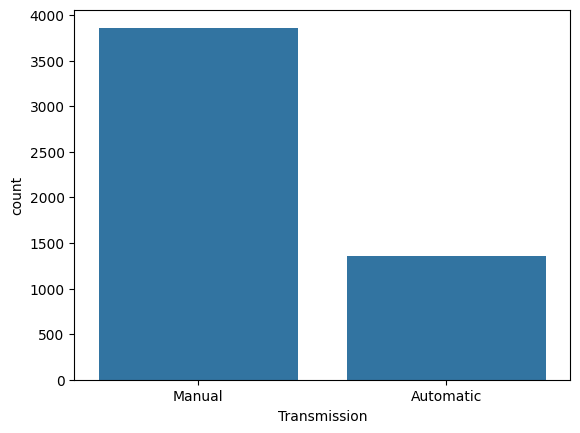

In [ ]:
### Transmission 컬럼의 분포 시각화
sns.countplot(data = df_concat, x = "Transmission")
plt.show()

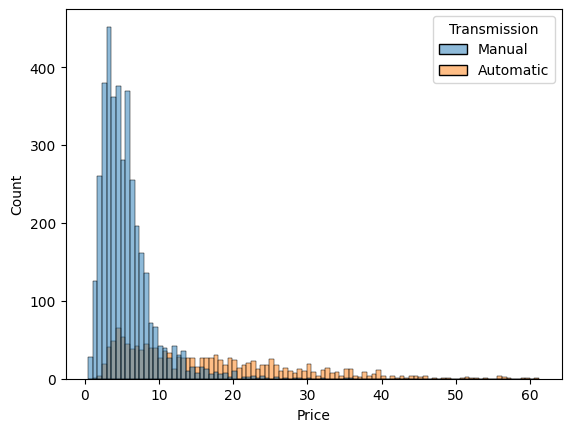

In [ ]:
### Price 컬럼과 Transmission 컬럼의 관계 --> 시각화
sns.histplot(data = df_concat, x = "Price", hue = "Transmission")
plt.show()

# 결과: 수동 (manual)은 데이터의 양은 많지만 대부분의 데이터가 저가쪽에 치우쳐져 있음 (price가 낮은곳에). 반면에 상대적으로 빈도수가 적은 자동 (automatic)은 고가쪽에 좀 더 치우쳐져 있음.
# 두가지 다른 변속기들이 서로 다른 양상을 보임
## manual는 가격에 대해서 굉장히 뾰족하고 automatic은 좀 더 넓게 퍼져있음

In [ ]:
### Price 컬럼과 Transmission 컬럼의 관계 --> 통계 분석 (가격의 크기 분포)

# Transmission == "Automatic" (빈도수는 적지만 전체적으로 비쌈) , 가격 분포에 대한 요약 통계량
condition1 = (df_concat.loc[:, "Transmission"] == "Automatic")
stats1 = df_concat.loc[condition1, "Price"].describe()    ## Automatic에 해당되는 해당들의 가격의 요약 통계량을 뽑음
print(f"Automatic의 경우, 가격 분포에 대한 요약 통계량 : \n{stats1}")

print("-" * 80)

# Transmission == "Manual" , 가격 분포에 대한 요약 통계량
condition2 = (df_concat.loc[:, "Transmission"] == "Manual")
stats2 = df_concat.loc[condition2, "Price"].describe()
print(f"Manual의 경우, 가격 분포에 대한 요약 통계량 : \n{stats2}")

print("-" * 80)
## 한눈에 안들어오니깐 두개의 시리즈 (통계량)을 붙여서 데이터프레임으로 만듬 (한눈에 보이게)

# Automatic, Manual 요약 통계량 병합      (dataframe쪽 재방보기)
df_stats = pd.concat([stats1, stats2], axis = 1)  ## 콜롬 두개짜리 데이터프레임으로 만들어야되니깐 (연결되서) => axis = 1
df_stats.columns = ["Automatic", "Manual"]  ## 순서에 맞게 콜롬 이름을 붙여줌
print(f"Transmission 컬럼의 가격에 대한 요약 통계량 : \n{df_stats}")

Automatic의 경우, 가격 분포에 대한 요약 통계량 : 
count    1353.000000
mean       16.151840
std        11.155386
min         1.500000
25%         7.000000
50%        13.500000
75%        22.990000
max        61.250000
Name: Price, dtype: float64
--------------------------------------------------------------------------------
Manual의 경우, 가격 분포에 대한 요약 통계량 : 
count    3860.000000
mean        5.497523
std         3.498189
min         0.440000
25%         3.200000
50%         4.750000
75%         6.750000
max        35.820000
Name: Price, dtype: float64
--------------------------------------------------------------------------------
Transmission 컬럼의 가격에 대한 요약 통계량 : 
         Automatic       Manual
count  1353.000000  3860.000000
mean     16.151840     5.497523
std      11.155386     3.498189
min       1.500000     0.440000
25%       7.000000     3.200000
50%      13.500000     4.750000
75%      22.990000     6.750000
max      61.250000    35.820000


### Price 컬럼과 Mileage 컬럼이 관계 분석

In [ ]:
### Mileage 컬럼의 분포 --> 통계 분석

# 요약 통계량 추출
stats = df_concat.loc[:, "Mileage"].describe()
print(f"Mileage 컬럼의 요약 통계량 : \n{stats}")

# 결과: std가 4정도기 때문에 정규분포에 가깝게 할거면 4씩 mean으로부터 자르면 됨

Mileage 컬럼의 요약 통계량 : 
count    5213.000000
mean       18.774157
std         3.950558
min         9.000000
25%        16.020000
50%        18.600000
75%        21.430000
max        28.400000
Name: Mileage, dtype: float64


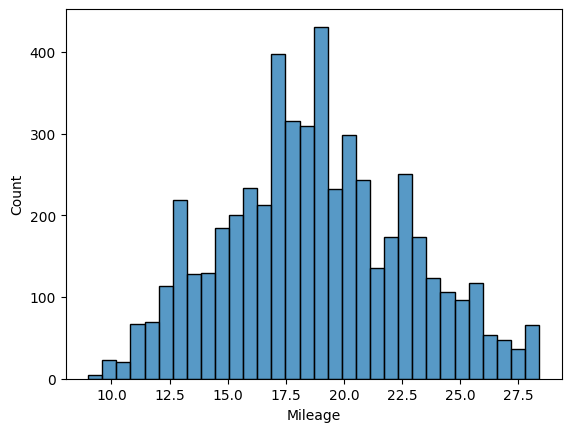

In [ ]:
### Mileage 컬럼의 분포 --> 시각화
sns.histplot(data = df_concat, x = "Mileage")   ## 정규 분포에 가깝게 띄는건 보임
plt.show()

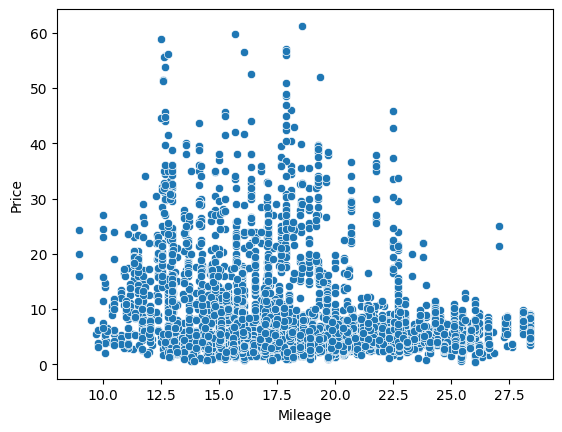

In [ ]:
### Price 컬럼과 Mileage 컬럼의 관계 --> 시각화
sns.scatterplot(data = df_concat, x = "Mileage", y = "Price")
plt.show()

## 관계가 뚜렷하지는 않아보인다. 둘로는 해결이 안되보인다

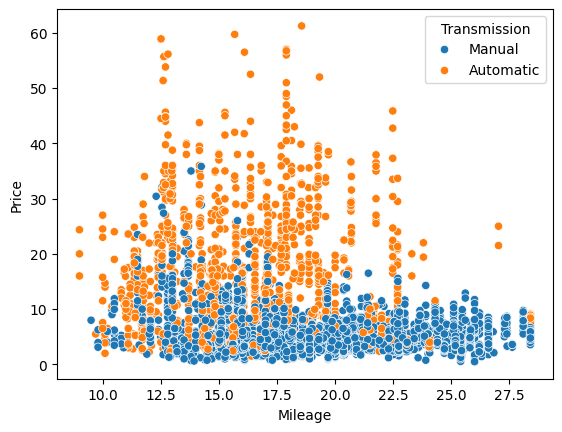

In [ ]:
### Price 컬럼과 Mileage 컬럼의 관계 분석 --> hue = "Transmission" 적용
sns.scatterplot(data = df_concat, x= "Mileage", y = "Price", hue = "Transmission")
plt.show()

## Manual나 Automatic나 Mileage가 떨어지거나 높아져도 둘 다 떠 어느정도 떨어지는 경향이 보임 (양쪽끝으로 갈수록)
## 그냥 알 수 있는 사실은 전체적으로 Automatic가 Price가 더 높다는것

### Price 컬럼과 Engine 컬럼의 관계 분석

In [ ]:
### Engine 컬럼의 분포 --> 통계 분석

# 요약 통계량 추출
stats = df_concat.loc[:, "Engine"].describe()
print(f"Engine 컬럼의 요약 통계량 : \n{stats}")

Engine 컬럼의 요약 통계량 : 
count    5213.000000
mean     1530.024554
std       471.391663
min       624.000000
25%      1197.000000
50%      1461.000000
75%      1896.000000
max      2999.000000
Name: Engine, dtype: float64


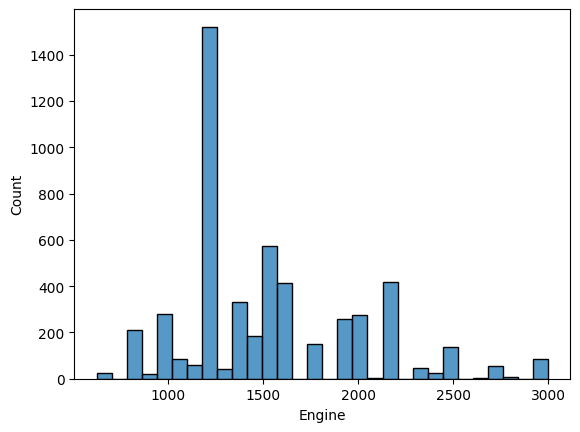

In [ ]:
### Engine 컬럼의 분포 --> 시각화
sns.histplot(data = df_concat, x = "Engine")
plt.show()

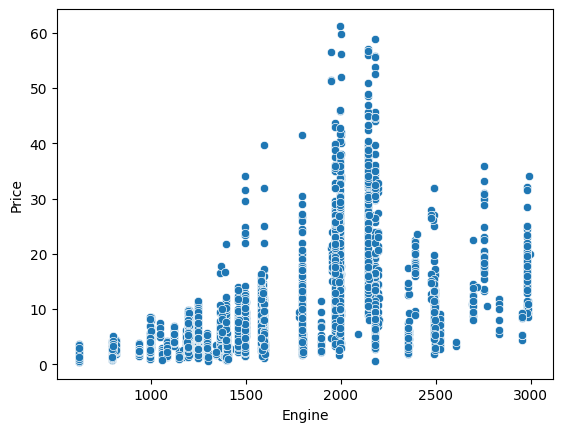

In [ ]:
### Price 컬럼과 Engine 컬럼의 관계 분석 --> 시각화
sns.scatterplot(data = df_concat, x = "Engine", y = "Price")
plt.show()

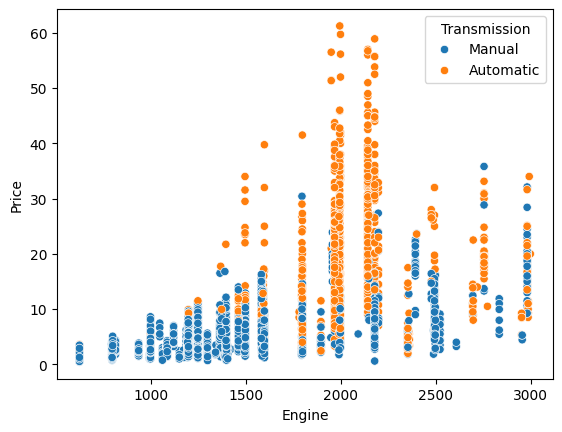

In [ ]:
### Price 컬럼과 Engine 컬럼 관계 분석 --> hue = "Transmission" 적용
sns.scatterplot(data = df_concat, x = "Engine", y = "Price", hue = "Transmission")
plt.show()

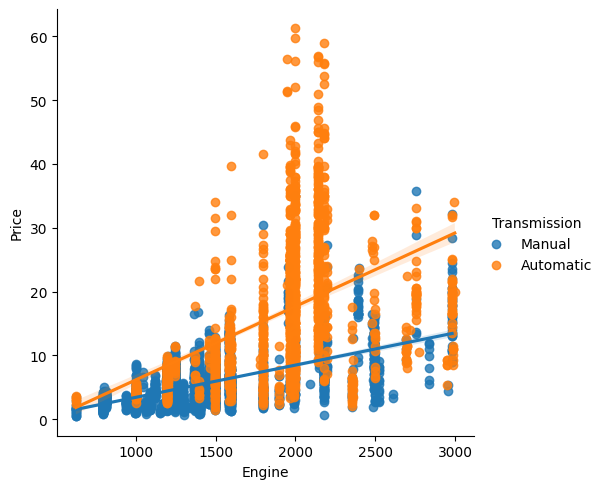

In [ ]:
### Price 컬럼과 Engine 컬럼 관계 분석 --> lmplot + hue = "Transmission" 적용
sns.lmplot(data = df_concat, x = "Engine", y = "Price", hue = "Transmission")
plt.show()

### Price 컬럼과 Power 컬럼의 관계 분석

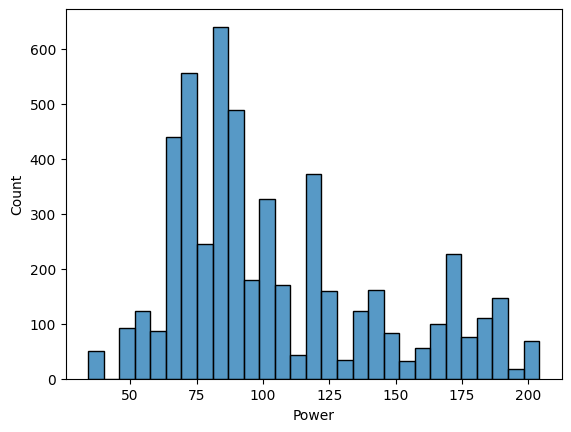

In [ ]:
### Power 컬럼의 분포 분석
sns.histplot(data = df_concat, x = "Power")
plt.show()

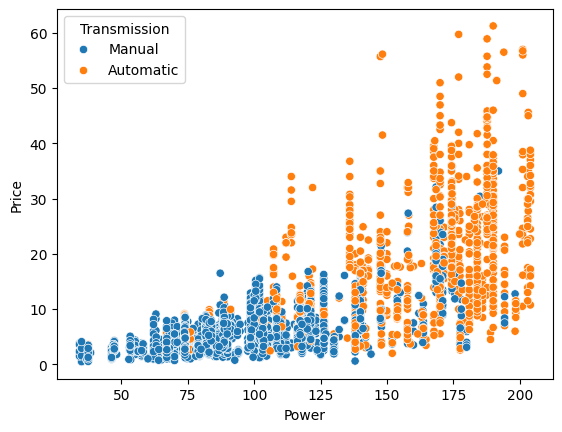

In [ ]:
### Price 컬럼과 Power 컬럼의 관계 --> 시각화
sns.scatterplot(data = df_concat, x = "Power", y = "Price", hue = "Transmission")
plt.show()

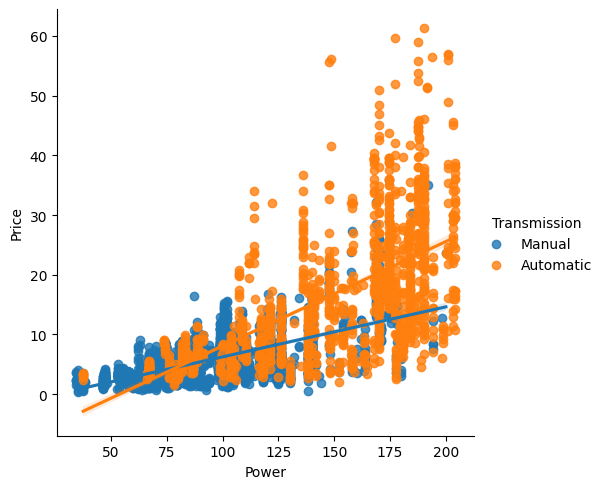

In [ ]:
### Price 컬럼과 Power 컬럼의 관계 --> lmplot() + hue = "Transmission" 적용 시각화
sns.lmplot(data = df_concat, x = "Power", y = "Price", hue = "Transmission")
plt.show()